# PGF5005 — Mecânica Clássica · Item 4.2  
**Método de Euler aplicado ao pêndulo simples**

Neste caderno implementamos, o método de **Euler ** para
resolver as equações de Hamilton do pêndulo simples adimensional,
baseado nas equações e notação do enunciado.

Hamiltoniana adimensional:  
$$
H(q,p) = \frac{p^2}{2} - \cos q.
$$

Equações de Hamilton:  
$$
\dot q = \frac{\partial H}{\partial p} = p,\qquad
\dot p = -\,\frac{\partial H}{\partial q} = -\sin q.
$$

**Método de Euler ** — conforme a Eq. (4) do texto:  
$$
\begin{aligned}
q^{(n+1)} &= q^{(n)} + \Delta t\,\frac{\partial H}{\partial p}\big|_{(q^{(n)},p^{(n)})}
           = q^{(n)} + \Delta t\,p^{(n)},\\
p^{(n+1)} &= p^{(n)} - \Delta t\,\frac{\partial H}{\partial q}\big|_{(q^{(n)},p^{(n)})}
           = p^{(n)} - \Delta t\,\sin\!\big(q^{(n)}\big).
\end{aligned}
$$

> **Observação:** o item 4.2 pede *Euler convencional*. O item 2.2 do texto discute o
> **Euler simplético** (Euler–Cromer), que será usado depois (item 4.3). Aqui focamos
> apenas no Euler convencional para cumprir 4.2.


## Imports

In [1]:
# Requisitos: numpy e matplotlib (sem seaborn)
import math
import numpy as np
import matplotlib.pyplot as plt


## Campos de derivadas e energia

Codificamos $\dot q$ e $\dot p$ a partir da Hamiltoniana, e a energia
$H(q,p)$ para checagens de consistência (embora o método de Euler **não**
conserve energia).

In [3]:
def dq_dt(q, p):
    return p

def dp_dt(q, p):
    return -math.sin(q)

def H(q, p):
    return 0.5*p*p - math.cos(q)


## Um passo do método de Euler 

Implementa exatamente as fórmulas acima para avançar um passo $\Delta t$.

In [4]:
def euler_step(q, p, dt):
    q_next = q + dt * dq_dt(q, p)
    p_next = p - dt * (math.sin(q))  # equivale a p + dt * dp_dt(q,p)
    return q_next, p_next


## Integração no intervalo $[0, T]$

Guardamos o histórico de $(t,q,p,H)$ para facilitar gráficos e diagnósticos.

In [5]:
def integrar_euler(q0, p0, dt, T):
    n_steps = int(np.ceil(T/dt))
    t = np.empty(n_steps+1)
    q = np.empty(n_steps+1)
    p = np.empty(n_steps+1)
    E = np.empty(n_steps+1)
    # estado inicial
    t[0] = 0.0
    q[0] = q0
    p[0] = p0
    E[0] = H(q0, p0)
    # laço temporal
    for n in range(n_steps):
        qn, pn = q[n], p[n]
        q[n+1], p[n+1] = euler_step(qn, pn, dt)
        t[n+1] = (n+1)*dt
        E[n+1] = H(q[n+1], p[n+1])
    return t, q, p, E


## Exemplo mínimo para validar a implementação

Rodamos uma simulação curta apenas para verificar a execução.
> É possível ajustar as condições iniciais ($q_0, p_0$), o passo $\Delta t$ e o tempo total $T$.

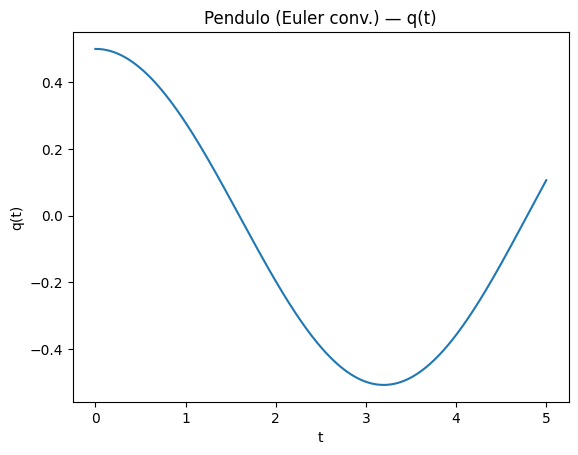

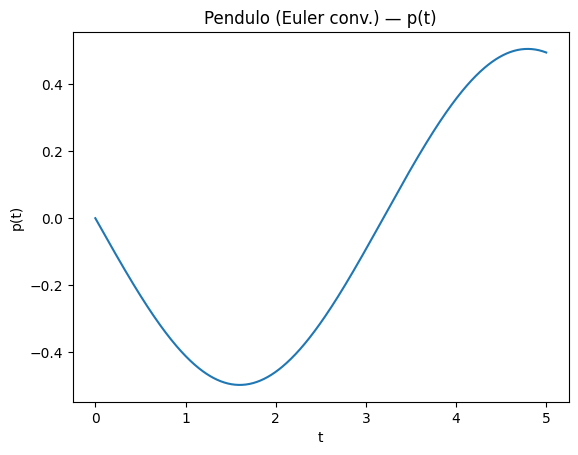

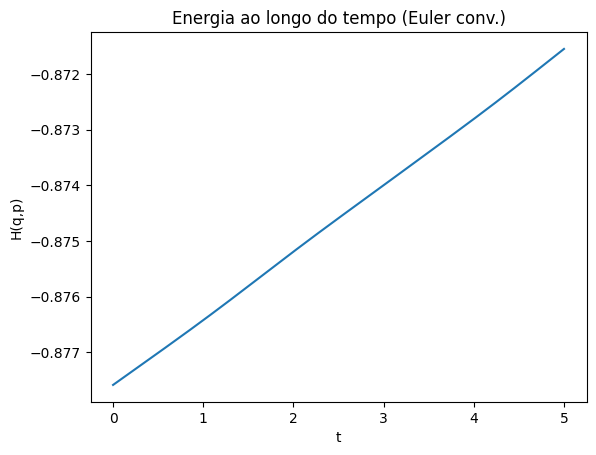

In [6]:
# Condições iniciais e parâmetros
q0 = 0.5   # rad
p0 = 0.0   # adimensional
dt = 1e-2  # passo
T  = 5.0   # tempo total

t, q, p, E = integrar_euler(q0, p0, dt, T)

# Gráfico 1: q(t)
plt.figure()
plt.plot(t, q)
plt.xlabel("t")
plt.ylabel("q(t)")
plt.title("Pendulo (Euler conv.) — q(t)")
plt.show()

# Gráfico 2: p(t)
plt.figure()
plt.plot(t, p)
plt.xlabel("t")
plt.ylabel("p(t)")
plt.title("Pendulo (Euler conv.) — p(t)")
plt.show()

# Gráfico 3: Energia (não conservada no Euler conv.)
plt.figure()
plt.plot(t, E)
plt.xlabel("t")
plt.ylabel("H(q,p)")
plt.title("Energia ao longo do tempo (Euler conv.)")
plt.show()


---
### Preparando para o item 4.3 (adiantamento rápido)

Para o próximo item, será útil ter uma função de **fase \((q,p)\)** e varrer
diferentes \(\Delta t\) e condições iniciais (librar/rotacionar).
Deixamos abaixo uma célula de utilidade para o diagrama de fase.


In [ ]:
def plot_fase(t, q, p, titulo="Diagrama de fase (q × p)"):
    plt.figure()
    plt.plot(q, p, lw=1.0)
    plt.xlabel("q")
    plt.ylabel("p")
    plt.title(titulo)
    plt.show()

# Exemplo de uso
plot_fase(t, q, p, "Fase — Euler conv.")